In [323]:
# Apurva Shah, 705595011, Psych 186B

# General Imports
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math
import statistics

## Question 1

#### 1A: Initializing Random Module

In [324]:
seed_value = 40
random.seed(seed_value)

#### 1B: Generating 50,000 Random Numbers


In [325]:
cut_off_values = [0.0999, 0.1999, 0.2999, 0.3999, 0.4999, 0.5999, 0.6999, 0.7999, 0.8999, 0.9999]

num_bins = 10 
num_iterations = 50000

# Initializing Bins
bins = [0]*10

# Generating Random Numbers and Putting into Respective Bins

for _ in range(0, num_iterations):
    random_number = random.random()
    bin_index = int(random_number * num_bins)
    bins[bin_index] += 1

bins

[5031, 5085, 5040, 5051, 4984, 5017, 4931, 4951, 4960, 4950]

#### 1C: Plotting Histogram of Bins

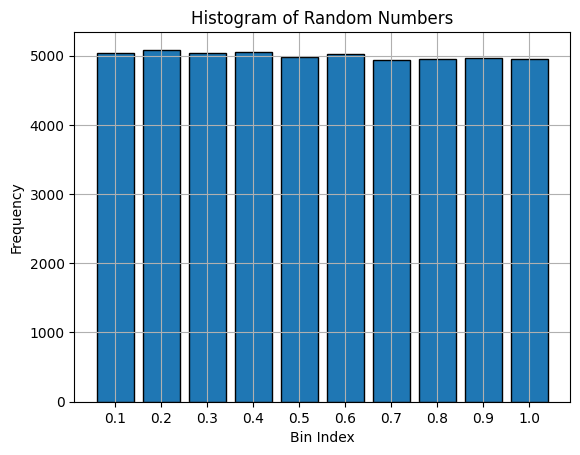

In [326]:
plt.bar(range(num_bins), bins, edgecolor='black')

plt.title('Histogram of Random Numbers')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(range(num_bins), [f'{v:.1f}' for v in cut_off_values])
plt.grid(True)
plt.show()

## Question 2

In [327]:
num_bins = 20 
num_iterations = 50000
bin_width = 120 / num_bins  # Each bin covers a range of 6

# Initializing Bins
bins = [0]*num_bins

# Generating Random Numbers and Putting into Respective Bins

for _ in range(0, num_iterations):
    curr_total = 0
    for _ in range(0, 12):
        # Create Random Number (1-10)
        random_number = random.random()*10
        curr_total += random_number
    
    # Placing into bins
    bin_index = int(curr_total // bin_width)
    if bin_index >= num_bins:  # In case the sum is exactly 120
        bin_index = num_bins - 1
    bins[bin_index] += 1

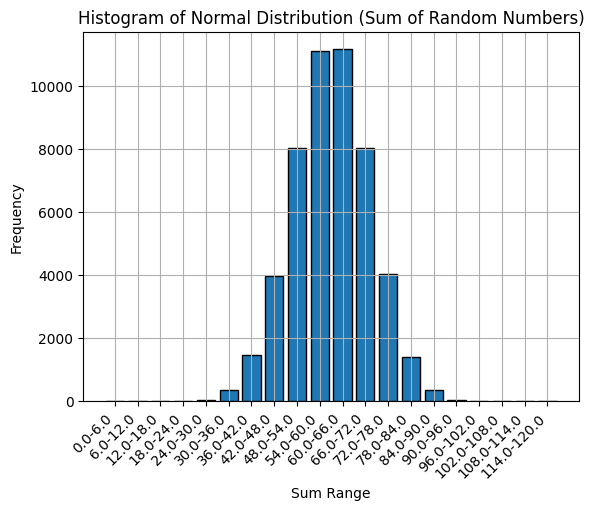

In [328]:
# Generating the labels for the x-axis based on the bin ranges
bin_labels = [f'{i*bin_width:.1f}-{(i+1)*bin_width:.1f}' for i in range(num_bins)]

# Plotting the histogram
plt.bar(range(num_bins), bins, edgecolor='black')

plt.title('Histogram of Normal Distribution (Sum of Random Numbers)')
plt.xlabel('Sum Range')
plt.ylabel('Frequency')
plt.xticks(range(num_bins), bin_labels, rotation=45, ha="right")  # Rotate labels for better readability
plt.grid(True)
plt.show()

Both my histogram for this part of the problem and the normal distribution have a bell shaped curve. Compared to the values that we see for generating random numbers between one and zero, when we add them up, we see that they follow a pattern. We can attribute this curve to the central limit theorem.

## Question 3

#### 3A:

The dot product in this case is the product of the magnitudes of the two vectors multiplied by the cosine of the angle shared between the two vectors.

In [329]:
# Utility Functions for Vector Calculations
class VectorCalculator():
    def __init__(self):
        pass
        
    def calculate_length(self, vector):
        # Calculates the length of a vector given a vector
        sum = 0
        for i in vector:
            sum += i**2
        return math.sqrt(sum)
        
    def create_normalized_vector(self, dimension):
        vector = []
        normalized_vector = []

        # Create Vector of Dimension
        for i in range(1, dimension):
            num = random.random() - 0.5
            vector.append(num)
        
        vector_length = self.calculate_length(vector)

        for i in vector:
            normalized_vector.append(i/vector_length)
        
        return normalized_vector
    
    def calculate_dot_product(self, v1, v2):
        # Calculates the dot product between two vectors
        dot_product = 0

        # Vectors are not the same dimension
        if len(v1) != len(v2):
            raise Exception()

        for i in range(0, len(v1)):
            dot_product += v1[i]*v2[i]
        
        return dot_product
    
    def run_simulations(self, dimension):
        # Runs simulations calculating the dot product of two normalized vectors of dimension and plotting results of 50000 iterations
        simulation_runs = 50000
        num_bins = 20
        bin_range = 2  # Range from -1 to 1
        bin_width = bin_range / num_bins

        bins = [0] * num_bins
        dot_product_stats = []

        for i in range(simulation_runs):
            v1 = self.create_normalized_vector(dimension)
            v2 = self.create_normalized_vector(dimension)

            dot_product = self.calculate_dot_product(v1, v2)
            dot_product_stats.append(dot_product)
            
            # Adjust the range of dot_product to 0 to 2 (from -1 to 1) to place in bins
            adjusted_dot_product = dot_product + 1
            bin_index = int(adjusted_dot_product // bin_width)
            
            # Ensure the bin_index does not exceed the number of bins
            if bin_index >= num_bins:
                bin_index = num_bins - 1

            bins[bin_index] += 1

        # Graphing Histogram of Dot Product
        plt.bar(range(20), bins, edgecolor='black')
        title_name = 'Histogram of Dot Products of Normalized Vectors with Dimensionality of ' + str(dimension)
        plt.title(title_name)
        plt.xlabel('Dot Product Range')
        plt.ylabel('Frequency')
        plt.xticks(range(num_bins), [f'{-1 + i*bin_width:.2f}' for i in range(num_bins)], rotation=45)
        plt.grid(True)
        plt.show()

        # Printing mean and standard deviation of dot products
        average = statistics.mean(dot_product_stats)
        stdev = statistics.stdev(dot_product_stats)
        print("The average of this simulation generating dot-products of normalized vectors with the dimensionality of ", dimension, "is: " , average)
        print("The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of ", dimension, "is: " , stdev)

        return bins

vector_mod = VectorCalculator()

#### 2B:

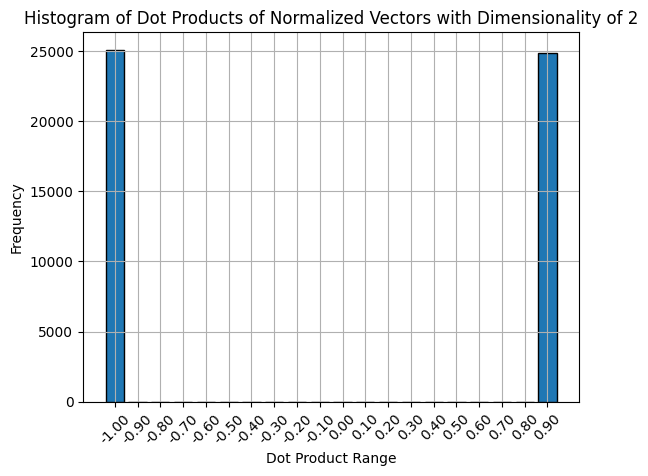

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  2 is:  -0.00476
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  2 is:  0.9999986711725406


In [330]:
# Simulation with Dimensionality of 2
res = vector_mod.run_simulations(2)

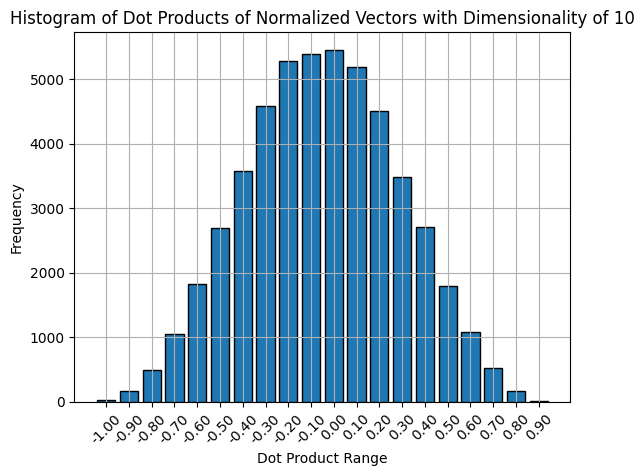

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  10 is:  -0.00040723539721983324
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  10 is:  0.33441094561899826


In [331]:
res = vector_mod.run_simulations(10)

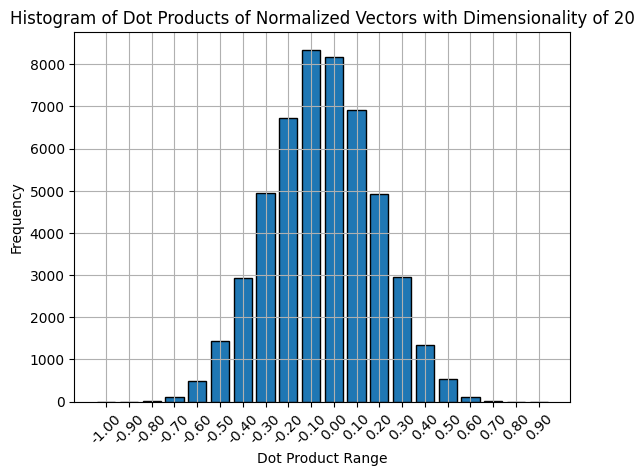

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  20 is:  -0.00015100920379903897
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  20 is:  0.22956692082713084


In [332]:
res = vector_mod.run_simulations(20)

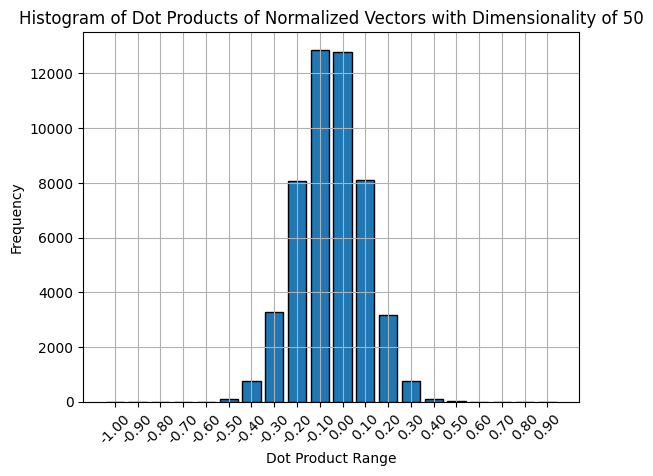

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  50 is:  -0.00011782533468724187
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  50 is:  0.14274169249027188


In [333]:
res = vector_mod.run_simulations(50)

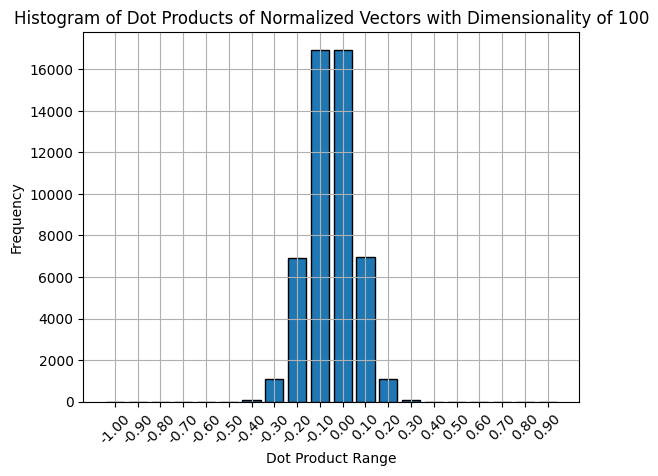

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  100 is:  7.1410773827814e-05
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  100 is:  0.10039646671174288


In [334]:
res = vector_mod.run_simulations(100)

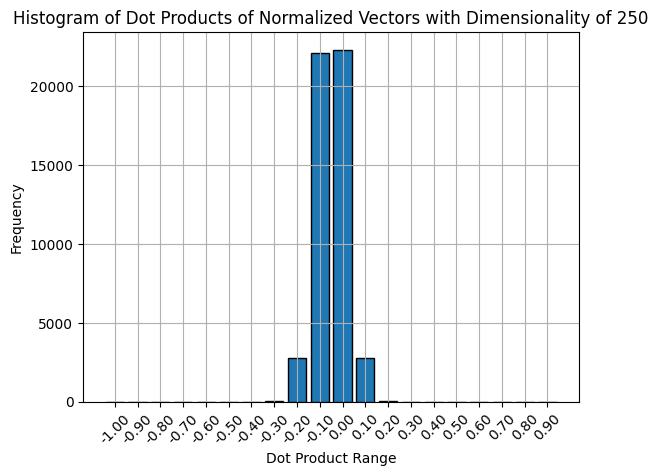

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  250 is:  0.0002646527064300462
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  250 is:  0.06317009551119827


In [335]:
res = vector_mod.run_simulations(250)

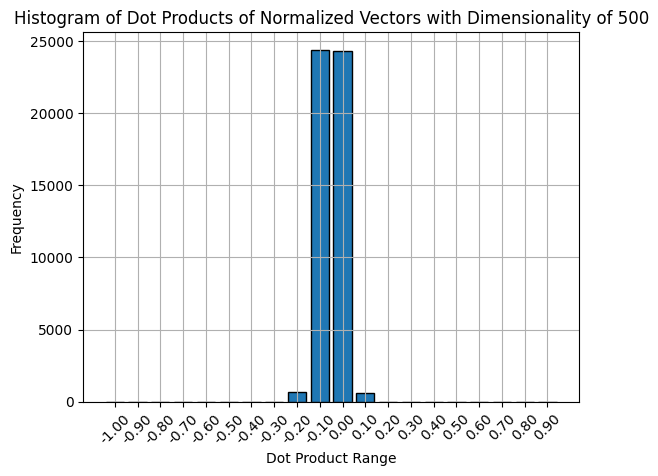

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  500 is:  -1.1134307964825696e-05
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  500 is:  0.04478361792141454


In [336]:
res = vector_mod.run_simulations(500)

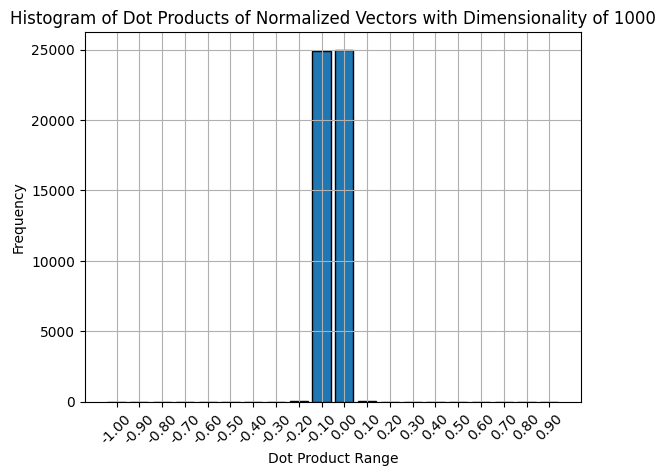

The average of this simulation generating dot-products of normalized vectors with the dimensionality of  1000 is:  9.442758809777592e-05
The standard deviation of this simulation generating dot-products of normalized vectors with the dimensionality of  1000 is:  0.03143678144168556


In [337]:
res = vector_mod.run_simulations(1000)

In [338]:
res = vector_mod.run_simulations(2000)

#### 3C:

It is important to note that the dot product of two vectors is the cosine of the angle between them multiplied by the product of their magnitudes. In this case, for normalized vectors, the dot product is just the cosine of the angle between them. 

When we geneerate vectors with elements from a uniform distribution centered around zero, the vectors are equally likely to point in any direction. In higher dimensional spaces, the vectors will likely be increasingly perpendicular to each other. This will make the mean of the dot products become closer to zero.

#### 3E:

Based off of my graphs, we see the general trend that as the dimensionality increases, the standard deviation of the dot products will decrease. We also see the width of the distribution narrow as the dimensionality increases within the simulation. 

This observation is supported by the idea that the dot product between two normalized vectors in higher dimensions is less likely to be close to -1 or 1 which would mean the vectors are close to being parallel. Therefore, as the standard deviation increases, the range of possible angels between the two vectors will be more restricted. Since the probability is more peaked around the mean, there will be a smaller standard deviation.

## Question 4

In [ ]:
def estimate_pi(sim_num):
    # Runs a simulation to estimate the number of pi based on placing points within a circle

    captured_points = 0

    for i in range(1, sim_num):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        # Falls within the circle
        if (x**2 + y**2) <= 1:
            captured_points += 1
    est = (captured_points / sim_num)*4
    
    print("Iterated simulation ", sim_num, " times and estimated pi as the following: ", est)
    return est

In [ ]:
estimate_pi(2)
estimate_pi(10)
estimate_pi(100)
estimate_pi(10000)
estimate_pi(100000)

Iterated simulation  2  times and estimated pi as the following:  2.0
Iterated simulation  10  times and estimated pi as the following:  3.2
Iterated simulation  100  times and estimated pi as the following:  3.08
Iterated simulation  10000  times and estimated pi as the following:  3.1476
Iterated simulation  100000  times and estimated pi as the following:  3.14068


3.14068

As we increase the number of simulations we can see that we estimate the value of pi to a greater degree. With a smaller simulation number, the number of trials run is not sufficient to capture a uniform distribution within the square and circle. Basically, the results support the Monte Carlo method showing that the accuracy of the estimation increases with the number of iterations ran on the trial. 

## Question 5

I spent around 3 hours working on this assignment.